In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from helper_functions import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Check files in local folder
comp_results = [x for x in os.listdir('results') if x.startswith('duopoly_competition_details')]
comp_results

['duopoly_competition_details_20211124.csv',
 'duopoly_competition_details_20211125.csv',
 'duopoly_competition_details_20211126.csv',
 'duopoly_competition_details_20211127.csv',
 'duopoly_competition_details_20211128.csv',
 'duopoly_competition_details_20211129.csv',
 'duopoly_competition_details_20211130.csv',
 'duopoly_competition_details_20211201.csv']

In [4]:
# Check files in local folder
rankings = [x for x in os.listdir('results') if x.startswith('ranking')]
rankings

['ranking_20211124.csv',
 'ranking_20211125.csv',
 'ranking_20211126.csv',
 'ranking_20211127.csv',
 'ranking_20211128.csv',
 'ranking_20211129.csv',
 'ranking_20211130.csv',
 'ranking_20211201.csv']

In [5]:
# Load data
start_date, end_date = '2021-11-24', pd.to_datetime('today').strftime("%Y-%m-%d")

rank_data = load_rankings(start_date, end_date)
data = load_results(start_date, end_date)
data = remove_incomplete_seasons(data)

Loaded 13 rankings for 20211124
Loaded 13 rankings for 20211125
Loaded 13 rankings for 20211126
Loaded 13 rankings for 20211127
Loaded 12 rankings for 20211128
Loaded 10 rankings for 20211129
Loaded 10 rankings for 20211130
Loaded 13 rankings for 20211201
Loaded 428571 rows of data for 20211124
Loaded 435134 rows of data for 20211125
Loaded 485823 rows of data for 20211126
Loaded 450000 rows of data for 20211127
Loaded 500000 rows of data for 20211128
Loaded 500000 rows of data for 20211129
Loaded 500000 rows of data for 20211130
Loaded 400000 rows of data for 20211201


In [6]:
# Add columns
data['revenue'] = data['price'] * data['demand']

In [7]:
data.shape

(3696000, 12)

In [8]:
data['competitor_id'].unique()

array(['InterestingHamster', 'GiftedChachalaca', 'AmbrosialNumbat',
       'StirringGuillemot', 'LiterateAkita', 'AttentiveOriole',
       'SpikedFrigatebird', 'PrivateChupacabra', 'RareSnake',
       'BoldGoshawk', 'ShinyAsp', 'SassyChameleon', 'EagerToad'],
      dtype=object)

In [9]:
data['competition_id'].nunique()

375

In [10]:
data.head()

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors,date,revenue
0,g9GQfa,1,1,InterestingHamster,38.6,30.0,1,True,0.0,NaN,20211124,30.0
1,g9GQfa,1,2,InterestingHamster,33.8,30.5,2,True,0.0,NaN,20211124,61.0
2,g9GQfa,1,3,InterestingHamster,32.1,31.0,4,True,0.0,NaN,20211124,124.0
3,g9GQfa,1,4,InterestingHamster,50.9,31.5,5,True,0.0,NaN,20211124,157.5
4,g9GQfa,1,5,InterestingHamster,35.3,32.0,1,True,0.0,NaN,20211124,32.0


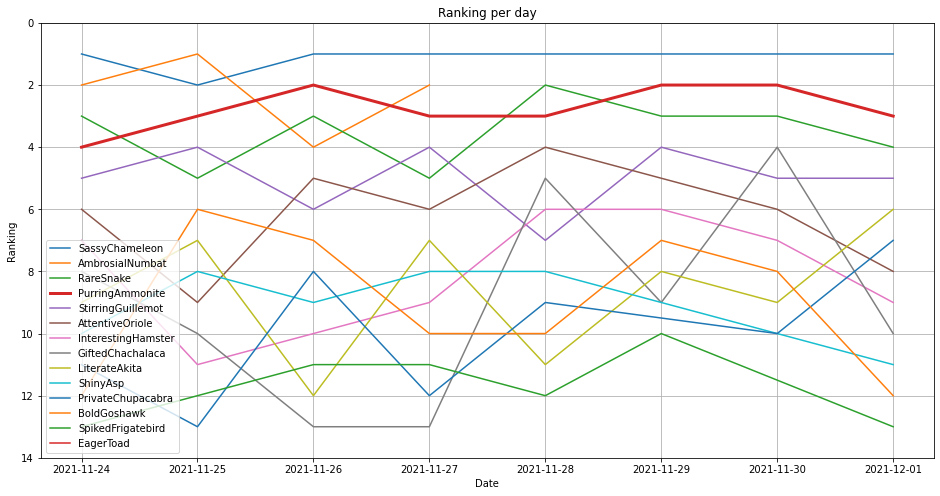

In [11]:
# plot ranking per day
plt.figure(figsize=(16, 8))
plt.title('Ranking per day')
for name in rank_data['Name'].unique():
    _ = plt.plot(
        rank_data.loc[rank_data['Name'] == name, 'date'], 
        rank_data.loc[rank_data['Name'] == name, 'Overall Ranking'],
        label=name,
        linewidth=3 if name == 'PurringAmmonite' else 1.5
    )
plt.gca().invert_yaxis()
plt.gca().set_ylim(rank_data['Overall Ranking'].max() +1, 0)
plt.legend(loc="lower left")
plt.xlabel('Date')
plt.ylabel('Ranking')
plt.grid()

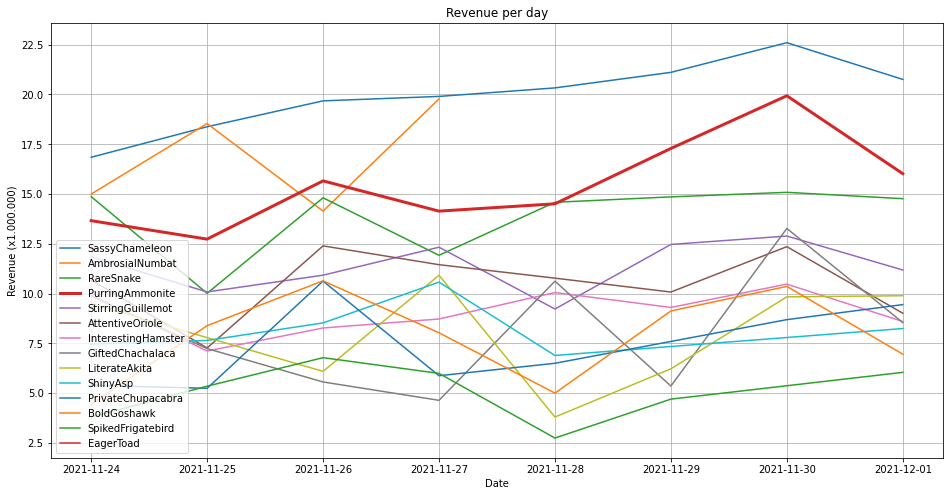

In [12]:
# Plot revenue per simulation day
plt.figure(figsize=(16, 8))
plt.title('Revenue per day')
for name in rank_data['Name'].unique():
    _ = plt.plot(
        rank_data.loc[rank_data['Name'] == name, 'date'], 
        rank_data.loc[rank_data['Name'] == name, 'Total revenu'] / 1000000,
        label=name,
        linewidth=3 if name == 'PurringAmmonite' else 1.5
    )
plt.legend(loc="lower left")
plt.xlabel('Date')
plt.ylabel('Revenue (x1.000.000)')
plt.grid()

In [13]:
rank_data.head()

,Overall Ranking,Name,Total revenu,AvgRevenue per simulation,Avg Ranking per simulation,MinSetPrice,MaxSetPrice,MeanPrice,Autocorrelation price,StockoutFrequency,date
0,1,SassyChameleon,16844713,421118,1.00,0.0,100.0,53.64,0.475,0.487,2021-11-24
1,2,AmbrosialNumbat,14997531,374938,1.13,0.0,100.0,54.56,0.764,0.824,2021-11-24
2,3,RareSnake,14870031,297401,1.10,1.0,100.0,68.50,0.864,0.858,2021-11-24
3,4,PurringAmmonite,13661836,303596,1.22,30.0,80.0,55.00,0.895,0.517,2021-11-24
4,5,StirringGuillemot,11850630,237013,1.88,10.0,120.0,63.84,0.621,0.143,2021-11-24


In [14]:
# Check revenue per season
revenue_ps = (data
              .groupby(['competition_id', 'competitor_id', 'selling_season', 'date'])
              .agg({'revenue': 'sum'})
              .reset_index()
             )

revenue_ps.head()

,competition_id,competitor_id,selling_season,date,revenue
0,32RWgR,LiterateAkita,1,20211129,3849.7
1,32RWgR,LiterateAkita,2,20211129,3096.4
2,32RWgR,LiterateAkita,3,20211129,2906.7
3,32RWgR,LiterateAkita,4,20211129,3635.7
4,32RWgR,LiterateAkita,5,20211129,2840.0


In [15]:
revenue_ps.shape

(36960, 5)

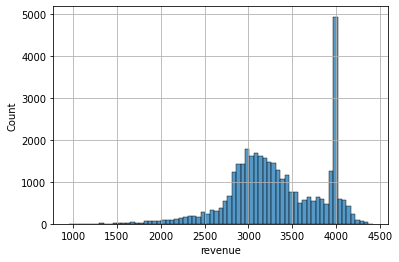

In [16]:
sns.histplot(revenue_ps['revenue'])
plt.grid()

In [17]:
revenue_ps['revenue'].describe()

count    36960.000000
mean      3329.973939
std        513.014849
min        948.300000
25%       2981.500000
50%       3271.600000
75%       3826.200000
max       4422.000000
Name: revenue, dtype: float64

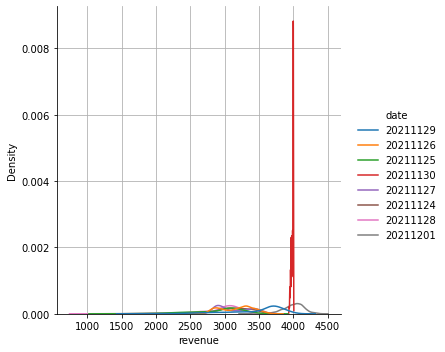

In [18]:
# TODO: make more visible (since 30th), plt.figure does not work for this plot..
sns.displot(data=revenue_ps, x='revenue', hue='date', kind="kde")
plt.grid()

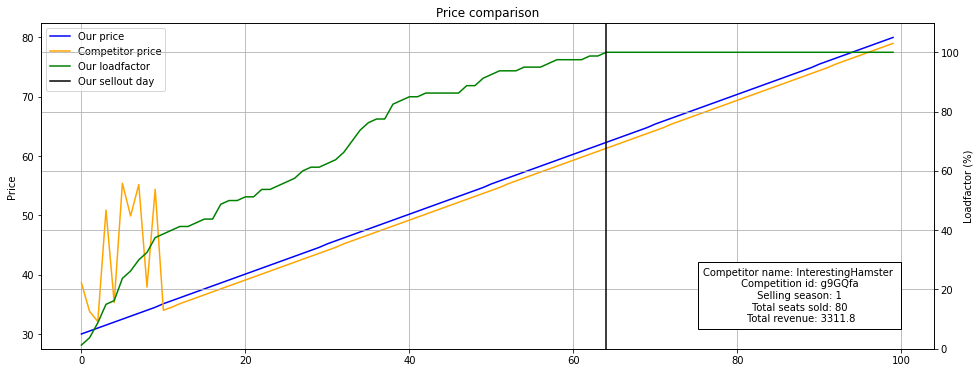

In [19]:
competition_id = 'g9GQfa'
selling_season = 1

plot_price_and_loadfactor(data, competition_id, selling_season)

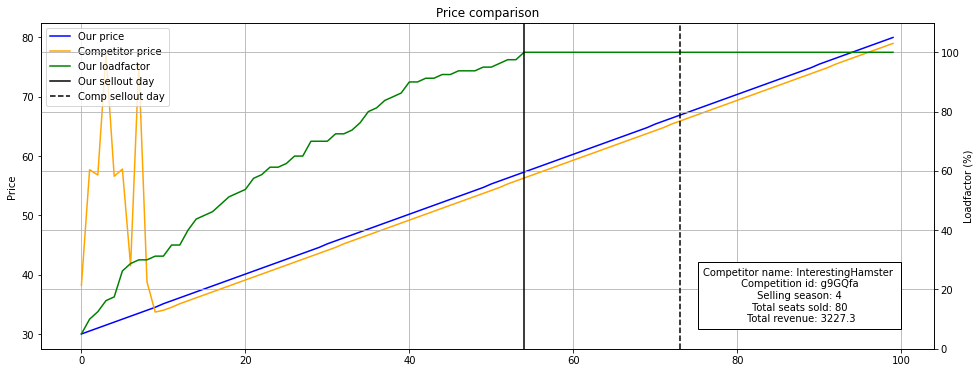

In [20]:
competition_id = 'g9GQfa'
selling_season = 4

plot_price_and_loadfactor(data, competition_id, selling_season)

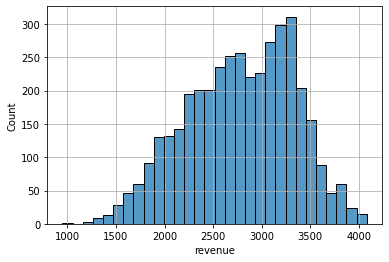

In [21]:
sns.histplot(revenue_ps.loc[revenue_ps['competitor_id'] == 'InterestingHamster', 'revenue'])
plt.grid()

In [22]:
revenue_ps[revenue_ps['competitor_id'] == 'InterestingHamster'].sort_values(by='revenue')

,competition_id,competitor_id,selling_season,date,revenue
30928,ZyYij9,InterestingHamster,94,20211128,948.3
2753,3F9ZnW,InterestingHamster,94,20211128,1164.8
32023,eavkbf,InterestingHamster,94,20211128,1254.1
295,32zVKp,InterestingHamster,11,20211125,1255.2
9804,3icBxn,InterestingHamster,50,20211125,1325.3
...,...,...,...,...,...
15137,42hFgJ,InterestingHamster,98,20211129,4046.9
21357,4RrYXK,InterestingHamster,98,20211129,4058.5
14542,3zbYDJ,InterestingHamster,98,20211129,4071.8
17717,4BcgHf,InterestingHamster,98,20211129,4080.1


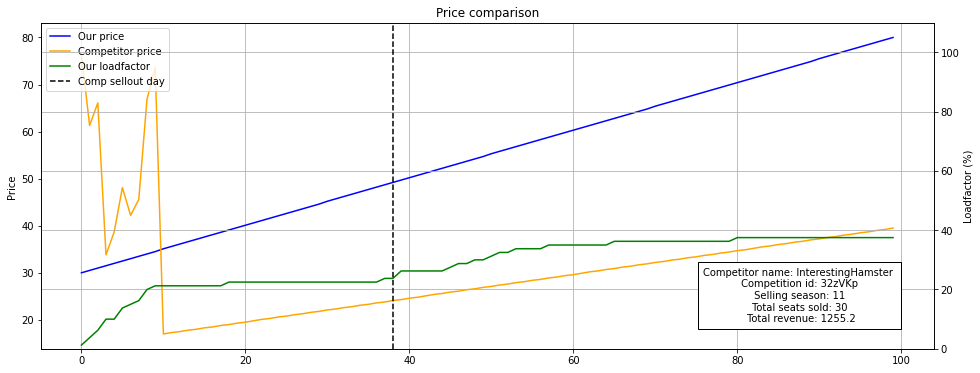

In [23]:
competition_id = '32zVKp'
selling_season = 11

plot_price_and_loadfactor(data, competition_id, selling_season)

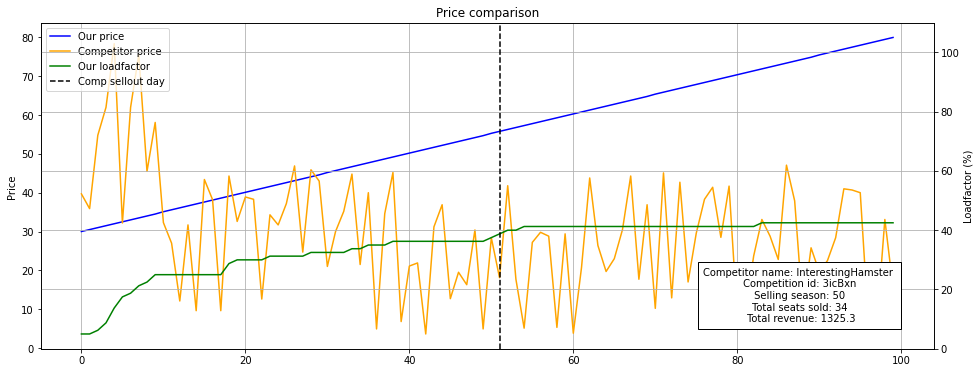

In [24]:
competition_id = '3icBxn'
selling_season = 50

plot_price_and_loadfactor(data, competition_id, selling_season)

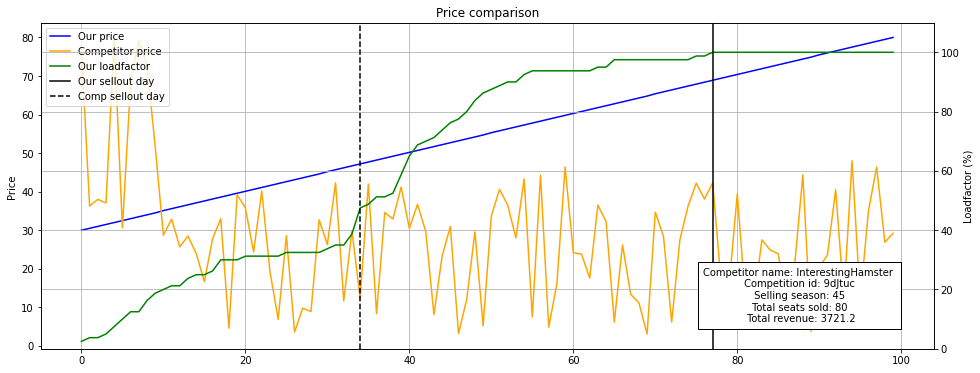

In [25]:
competition_id = '9dJtuc'
selling_season = 45

plot_price_and_loadfactor(data, competition_id, selling_season)

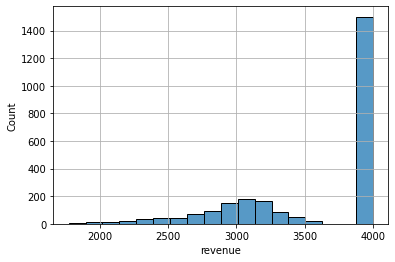

In [26]:
sns.histplot(revenue_ps.loc[revenue_ps['competitor_id'] == 'RareSnake', 'revenue'])
plt.grid()

In [27]:
revenue_ps[revenue_ps['competitor_id'] == 'RareSnake'].sort_values(by='revenue')

,competition_id,competitor_id,selling_season,date,revenue
29118,TrHqBc,RareSnake,69,20211128,1771.1
20443,4NxpWw,RareSnake,69,20211128,1790.6
20238,4Nj4qC,RareSnake,64,20211128,1830.1
29113,TrHqBc,RareSnake,64,20211128,1836.2
29055,TrHqBc,RareSnake,6,20211128,1851.8
...,...,...,...,...,...
7936,3ekXqB,RareSnake,57,20211130,4000.0
7937,3ekXqB,RareSnake,58,20211130,4000.0
7940,3ekXqB,RareSnake,61,20211130,4000.0
21131,4RqC6G,RareSnake,67,20211130,4000.0


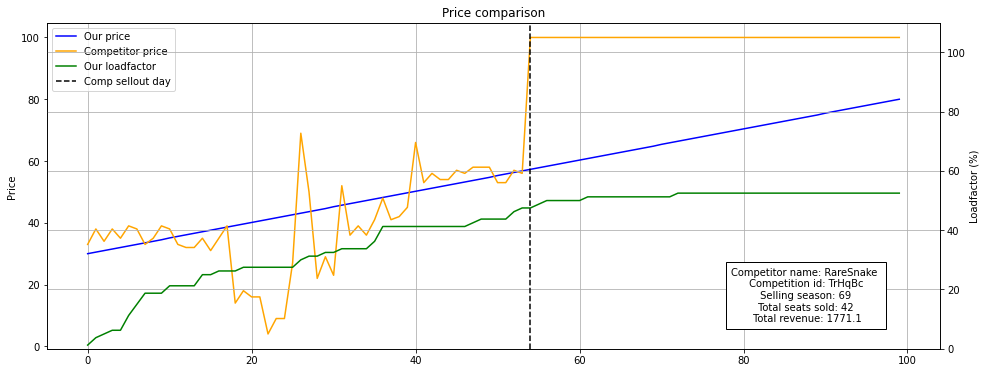

In [28]:
competition_id = 'TrHqBc'
selling_season = 69

plot_price_and_loadfactor(data, competition_id, selling_season)

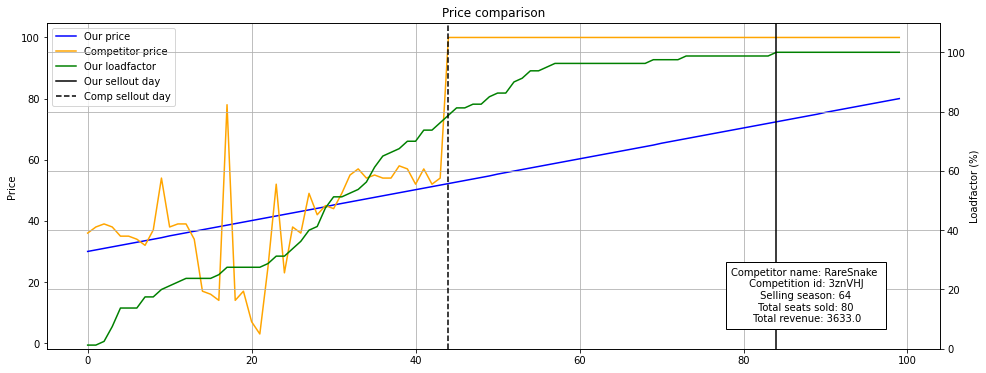

In [29]:
competition_id = '3znVHJ'
selling_season = 64

plot_price_and_loadfactor(data, competition_id, selling_season)

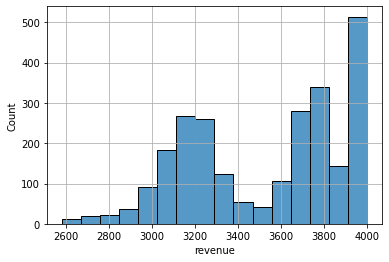

In [30]:
sns.histplot(revenue_ps.loc[revenue_ps['competitor_id'] == 'SassyChameleon', 'revenue'])
plt.grid()

In [31]:
revenue_ps[revenue_ps['competitor_id'] == 'SassyChameleon'].sort_values(by='revenue')

,competition_id,competitor_id,selling_season,date,revenue
23503,5ubhbz,SassyChameleon,94,20211128,2584.5
28048,NuyjBf,SassyChameleon,94,20211128,2595.1
34983,qzVZuY,SassyChameleon,94,20211128,2634.2
32708,hMvJL6,SassyChameleon,94,20211128,2634.2
28148,PLbpkg,SassyChameleon,94,20211128,2634.2
...,...,...,...,...,...
19388,4LDXq5,SassyChameleon,89,20211130,4000.0
15196,42nLaE,SassyChameleon,57,20211130,4000.0
15183,42nLaE,SassyChameleon,44,20211130,4000.0
24243,9NPqAP,SassyChameleon,44,20211130,4000.0


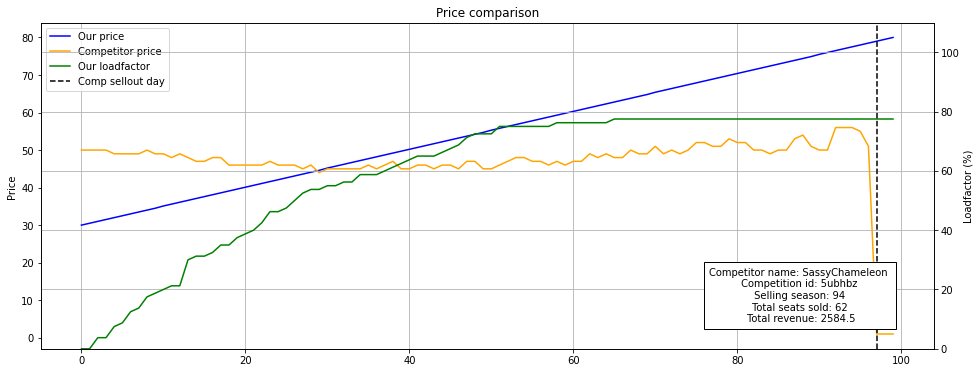

In [32]:
# When the price difference becomes too big, more demand will go with the competitor
competition_id = '5ubhbz'
selling_season = 94

plot_price_and_loadfactor(data, competition_id, selling_season)

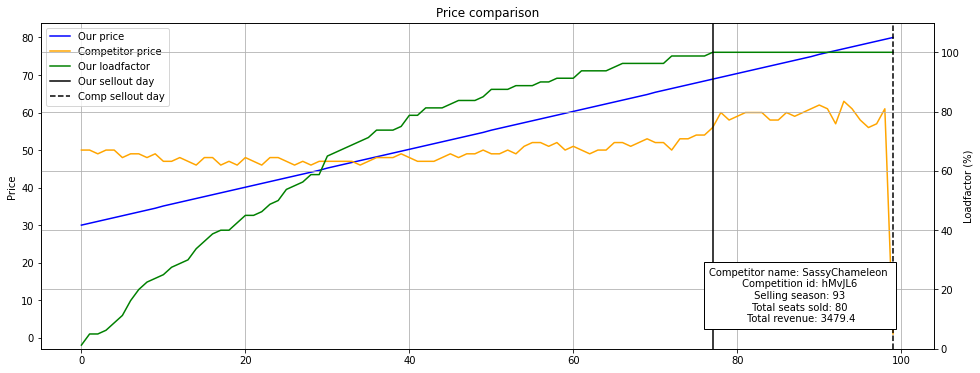

In [33]:
# Sassy has figured out how to hold on to inventory until last days
# He also throws his price down when his inventory is sold to try to manipulate competitor
competition_id = 'hMvJL6'
selling_season = 93

plot_price_and_loadfactor(data, competition_id, selling_season)

In [34]:
revenue_ps[revenue_ps['competitor_id'] == 'SassyChameleon'].sample(5, random_state=0)

,competition_id,competitor_id,selling_season,date,revenue
1338,3Af7YN,SassyChameleon,54,20211129,3725.2
35871,tnvihe,SassyChameleon,92,20211129,3701.1
35790,tnvihe,SassyChameleon,11,20211129,3543.4
15268,435ofw,SassyChameleon,29,20211129,3655.3
15780,44F56f,SassyChameleon,51,20211129,3734.8


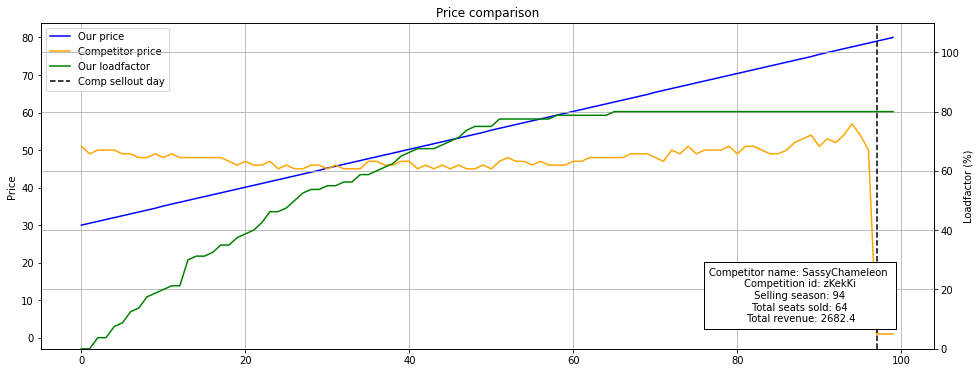

In [35]:
competition_id = 'zKekKi'
selling_season = 94

plot_price_and_loadfactor(data, competition_id, selling_season)

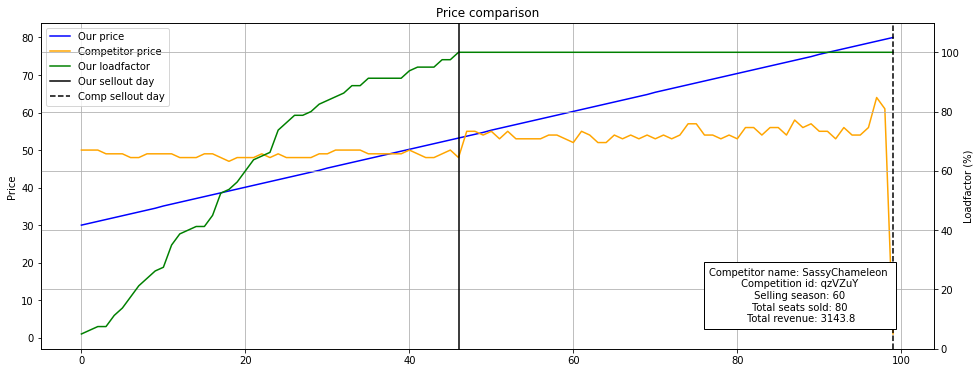

In [36]:
# Sassy increases the price when we sell out, but only marginally
competition_id = 'qzVZuY'
selling_season = 60

plot_price_and_loadfactor(data, competition_id, selling_season)

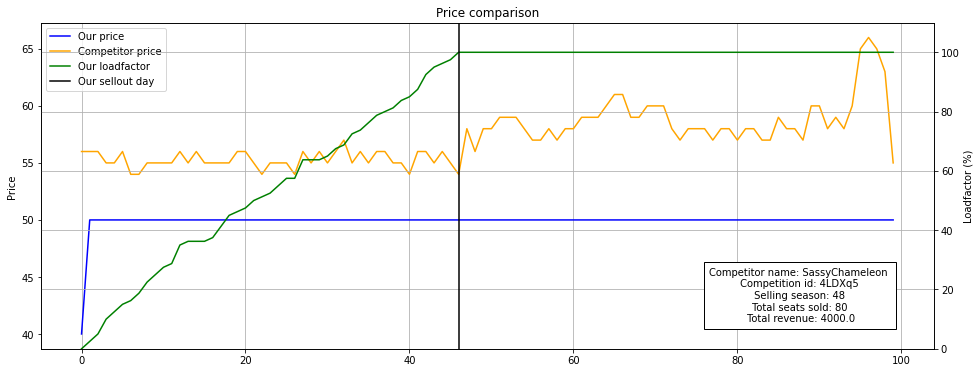

In [37]:
# Sassy increases the price when we sell out, but only marginally
competition_id = '4LDXq5'
selling_season = 48

plot_price_and_loadfactor(data, competition_id, selling_season)

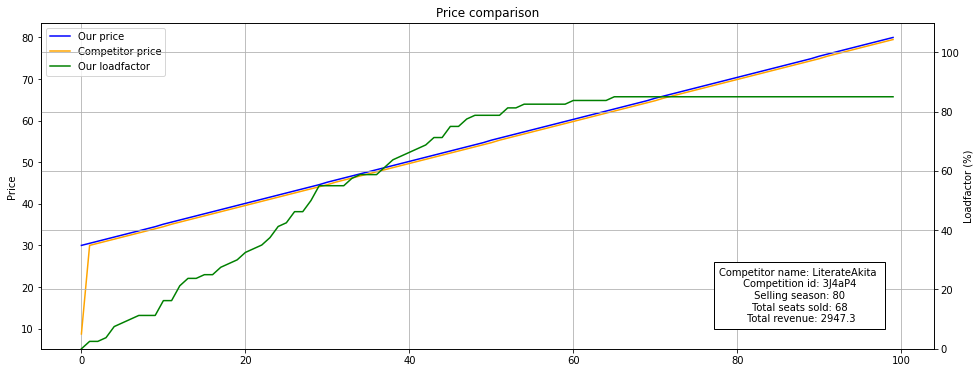

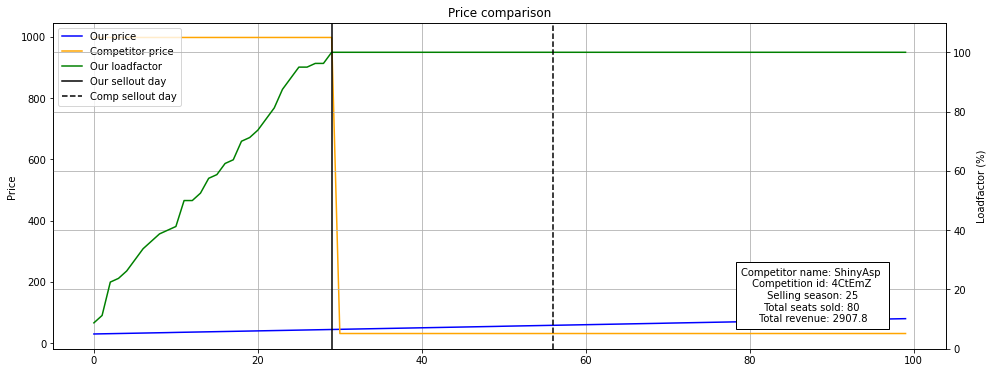

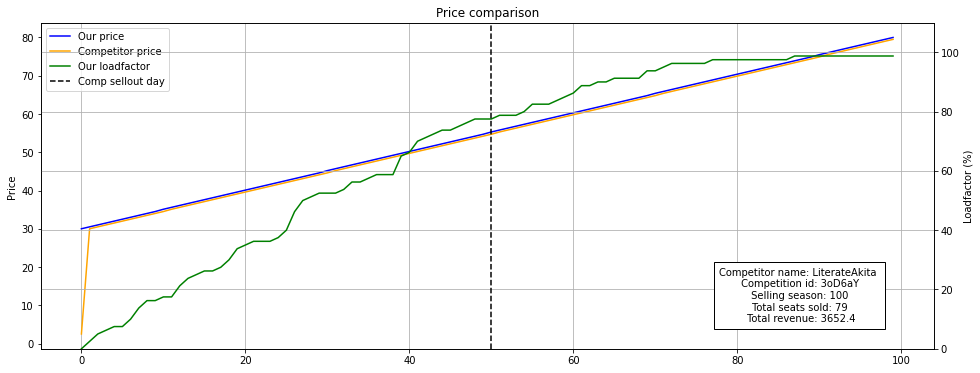

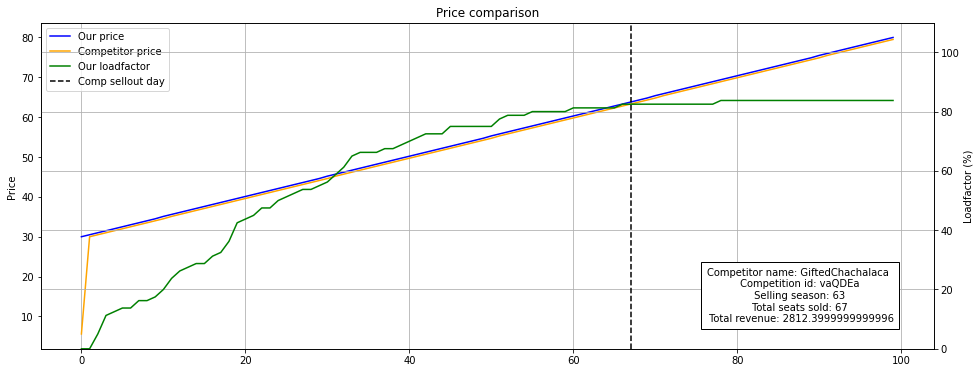

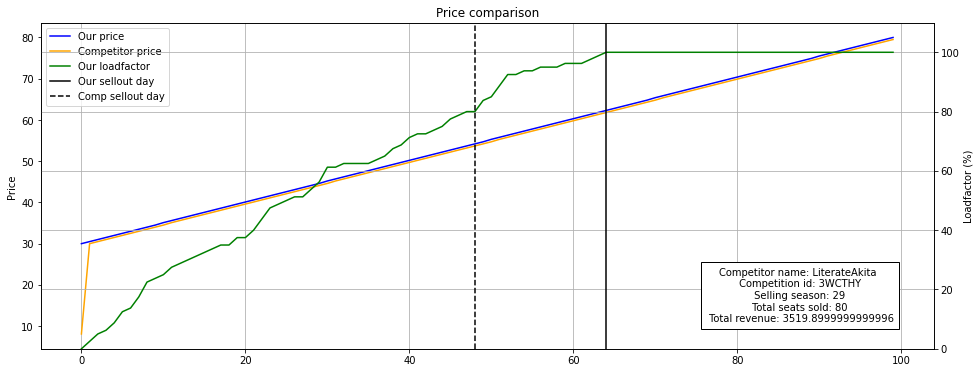

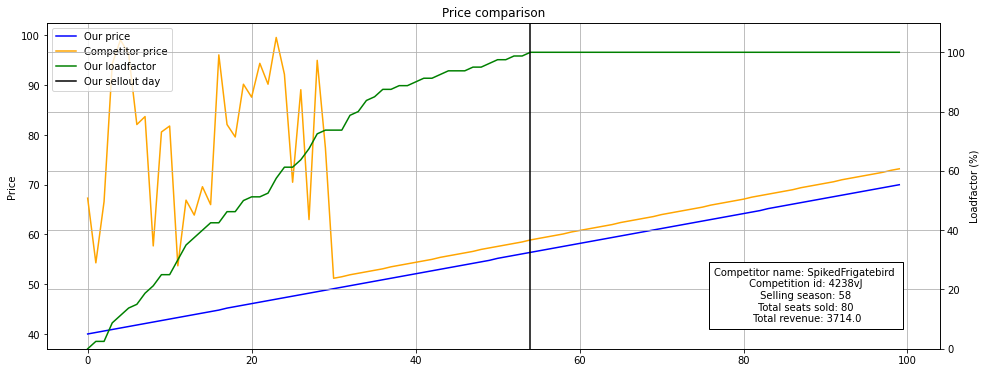

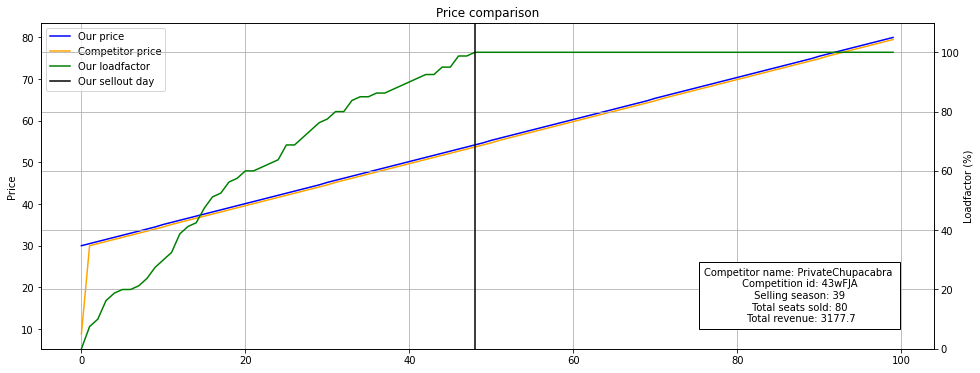

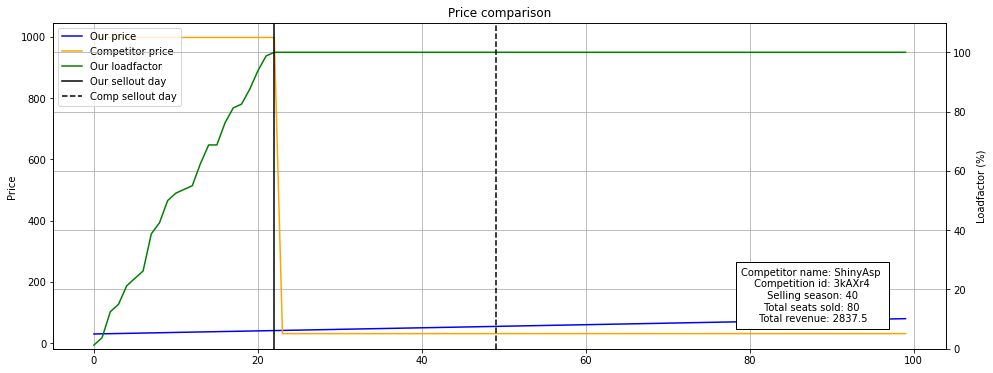

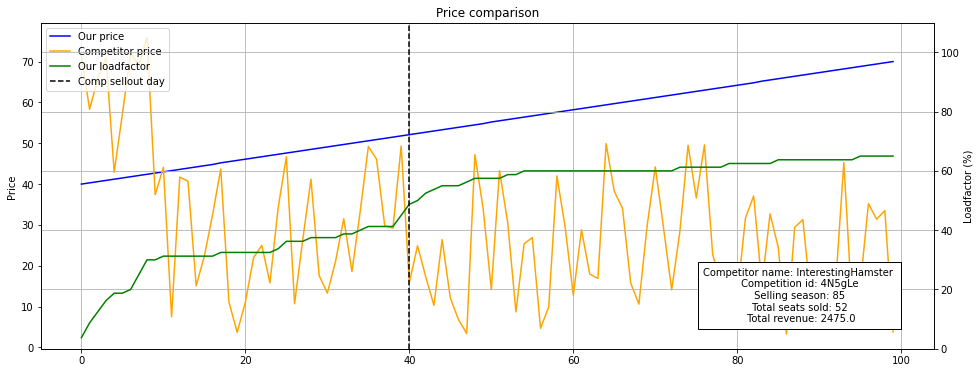

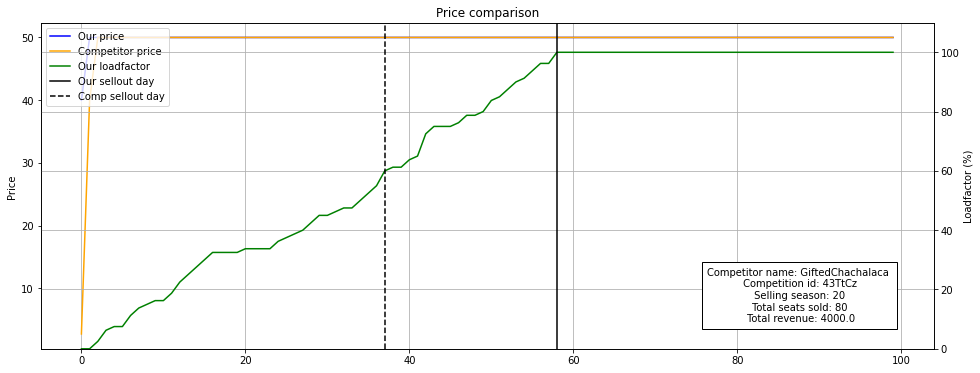

In [38]:
# Shiny asp sets the price very high to let you stock out quickly
random_sample = revenue_ps.sample(10, random_state=0).reset_index(drop=True)

for i in range(10):
    competition_id = random_sample.iloc[i, 0]
    selling_season = random_sample.iloc[i, 2]

    plot_price_and_loadfactor(data, competition_id, selling_season)

In [39]:
data.loc[data['competitor_id'] == 'ShinyAsp', 'price_competitor'].value_counts()

31.5     74550
998.0    70071
50.0     35000
31.3     21903
31.1     15807
31.2     12765
31.4     11379
31.0      5165
30.9      2030
30.8       830
Name: price_competitor, dtype: int64

In [40]:
data[data['date'] == '20211201'].sample(5)

,competition_id,selling_season,selling_period,competitor_id,price_competitor,price,demand,competitor_has_capacity,calculation_duration,errors,date,revenue
3421722,3Y6bMA,22,95,EagerToad,52.0,52.0,1,True,0.0,NaN,20211201,52.0
3514922,sK8TZh,54,95,StirringGuillemot,33.6,30.0,0,True,0.0,NaN,20211201,0.0
3333699,HTw7GY,42,72,StirringGuillemot,54.6,54.0,2,True,0.0,NaN,20211201,108.0
3565005,ZghDQC,55,78,BoldGoshawk,51.0,53.0,2,False,0.0,NaN,20211201,106.0
3404865,3m7hR7,54,38,StirringGuillemot,56.7,54.0,1,True,0.0,NaN,20211201,54.0


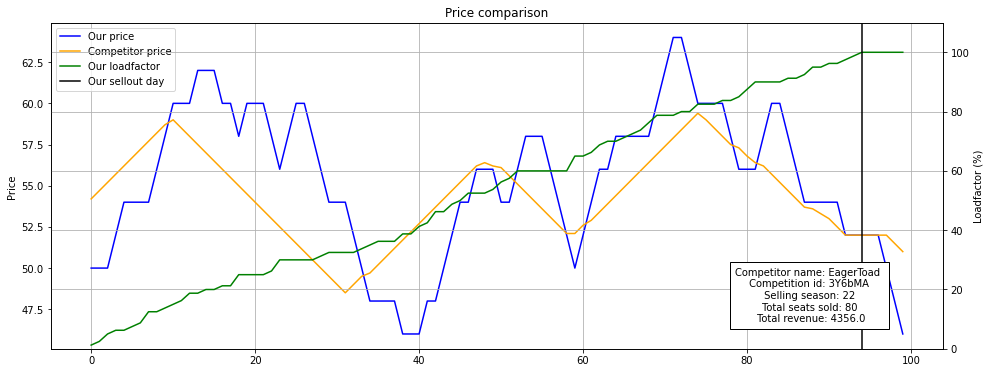

In [41]:
# Very good run in this simulation
competition_id = '3Y6bMA'
selling_season = 22

plot_price_and_loadfactor(data, competition_id, selling_season)

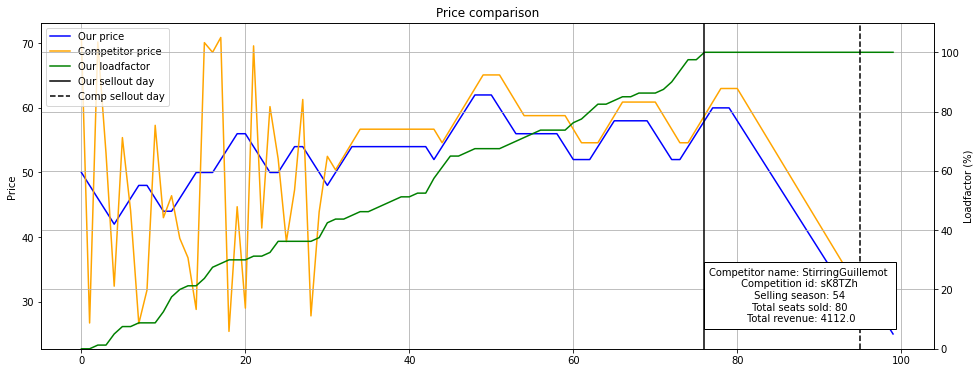

In [42]:
competition_id = 'sK8TZh'
selling_season = 54

plot_price_and_loadfactor(data, competition_id, selling_season)

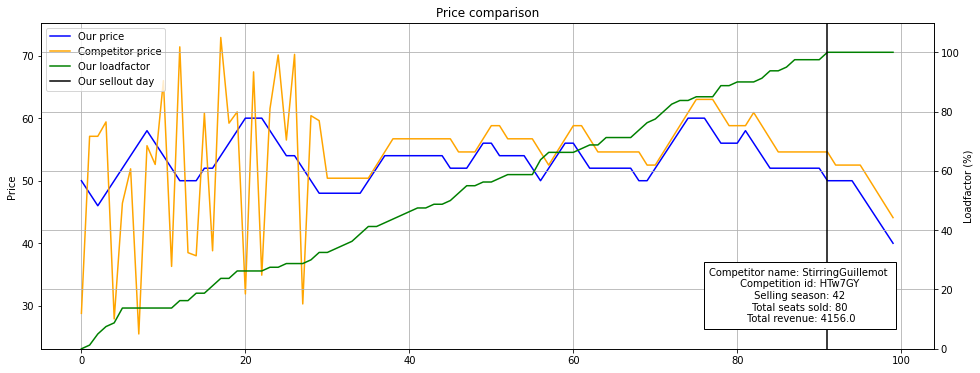

In [43]:
competition_id = 'HTw7GY'
selling_season = 42

plot_price_and_loadfactor(data, competition_id, selling_season)

In [47]:
revenue_ps[revenue_ps['date'] == '20211201'].sort_values(by='revenue')

,competition_id,competitor_id,selling_season,date,revenue
8078,3fKWtm,AttentiveOriole,4,20211201,3296.0
26919,Kjftes,AttentiveOriole,65,20211201,3310.0
8147,3fKWtm,AttentiveOriole,73,20211201,3350.0
3658,3MJqbr,AttentiveOriole,4,20211201,3356.0
35383,svuNMK,AttentiveOriole,4,20211201,3358.0
...,...,...,...,...,...
16325,48Zf9C,EagerToad,1,20211201,4370.0
3707,3MJqbr,AttentiveOriole,53,20211201,4380.0
13906,3xdZU7,EagerToad,22,20211201,4388.0
27207,LAvGqV,AttentiveOriole,53,20211201,4390.0


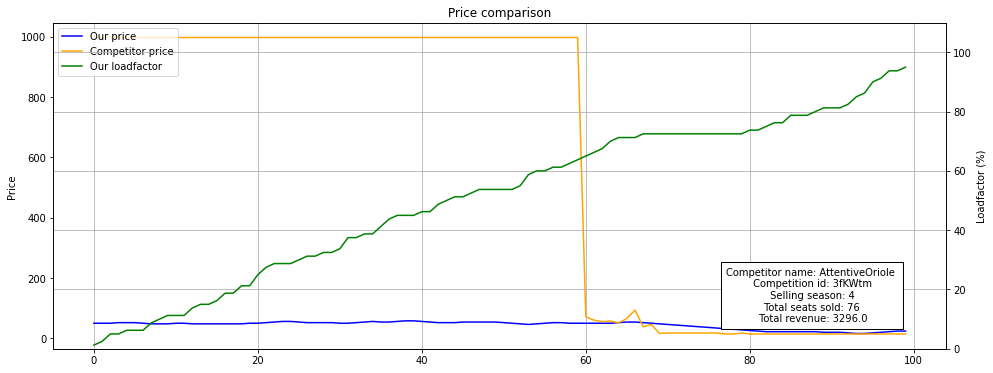

In [48]:
competition_id = '3fKWtm'
selling_season = 4

plot_price_and_loadfactor(data, competition_id, selling_season)

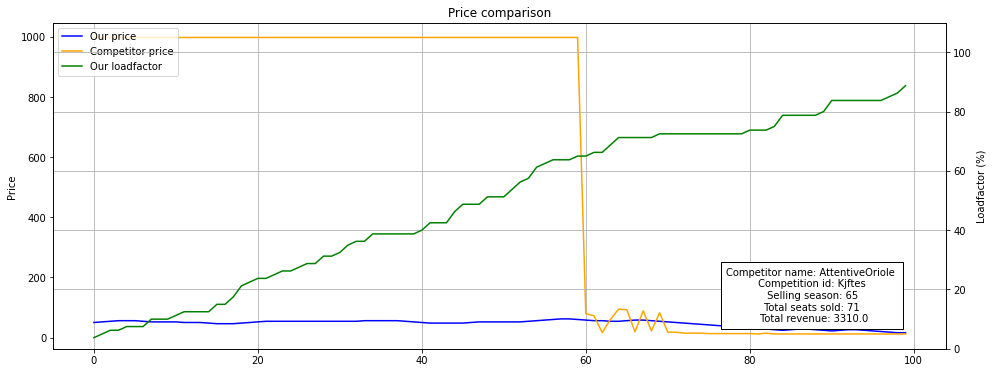

In [49]:
competition_id = 'Kjftes'
selling_season = 65

plot_price_and_loadfactor(data, competition_id, selling_season)

In [50]:
revenue_ps[(revenue_ps['date'] == '20211201') & (revenue_ps['competitor_id'] != 'AttentiveOriole')].sort_values(by='revenue')

,competition_id,competitor_id,selling_season,date,revenue
28981,TpsFe8,BoldGoshawk,32,20211201,3544.0
7311,3d9LmH,BoldGoshawk,32,20211201,3544.0
13016,3uw93g,BoldGoshawk,32,20211201,3544.0
5741,3X8maN,BoldGoshawk,32,20211201,3544.0
30766,ZghDQC,BoldGoshawk,32,20211201,3544.0
...,...,...,...,...,...
16325,48Zf9C,EagerToad,1,20211201,4370.0
6095,3YchWS,EagerToad,1,20211201,4370.0
5895,3Y6bMA,EagerToad,1,20211201,4370.0
13906,3xdZU7,EagerToad,22,20211201,4388.0


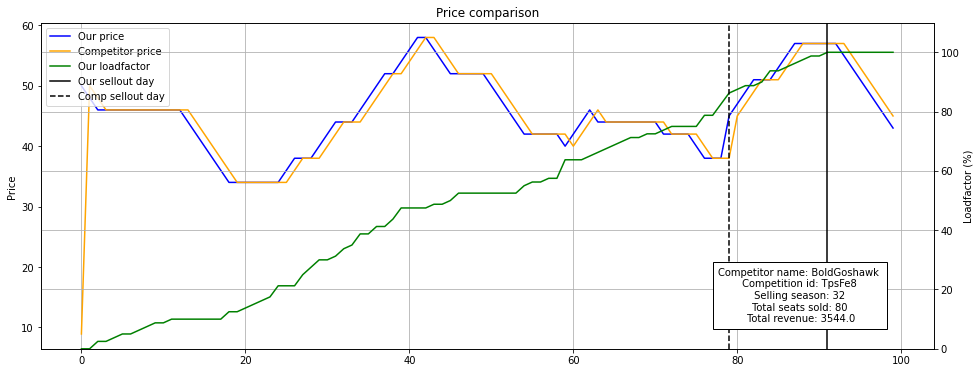

In [51]:
# Load factor looks pretty decent, price not gradually increasing over time
competition_id = 'TpsFe8'
selling_season = 32

plot_price_and_loadfactor(data, competition_id, selling_season)

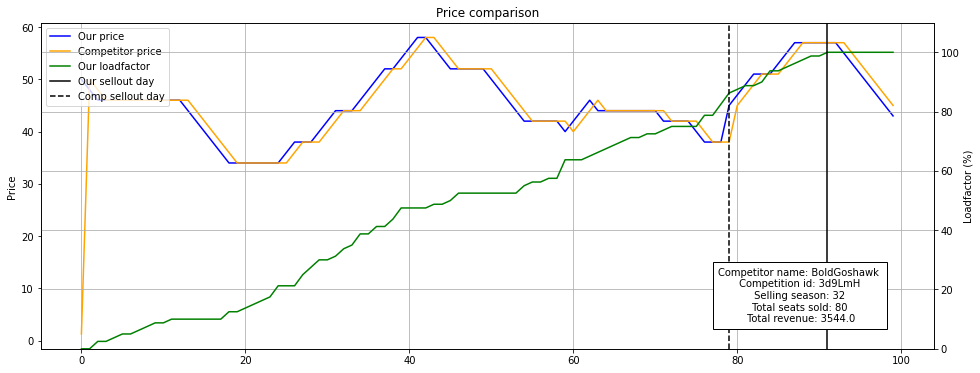

In [52]:
competition_id = '3d9LmH'
selling_season = 32

plot_price_and_loadfactor(data, competition_id, selling_season)